In [35]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Question To Be Answered: Do the genres represented on streaming services reflect audience interests?

The first section of data below identifies the highest-rated titles for each streaming service's content libraries (seperated by "Movies" and "Shows"). It then grabs the genres which the respective titles fall into, and plots them on a bar graph depicting the % of Titles x Genre. 

In [7]:
prime_MG = pd.read_csv("../Cleanish Data/By Genre/Prime Movies(G).csv")
prime_TVG = pd.read_csv("../Cleanish Data/By Genre/Prime TV(G).csv")
netflix_MG = pd.read_csv("../Cleanish Data/By Genre/Netflix Movies(G).csv")
netflix_TVG = pd.read_csv("../Cleanish Data/By Genre/Netflix TV(G).csv")
disney_MG = pd.read_csv("../Cleanish Data/By Genre/Disney Movies(G).csv")
disney_TVG = pd.read_csv("../Cleanish Data/By Genre/Disney TV(G).csv")

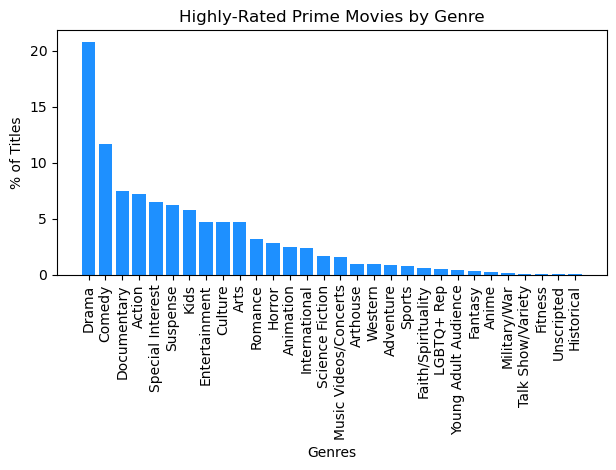

In [9]:
popular_PM=prime_MG.copy()
popular_PM=popular_PM.loc[prime_MG["Vote Average"]>=7]
popular_PM["Genre"]= popular_PM["Genre"].str.replace(" ","")
PMGenres=popular_PM["Genre"].value_counts()
PMGenres
#Total- 2613

PMOOT = []
for count in PMGenres:
    PMOOT.append((count/2613)*100)
    
x_Axis= np.arange(len(PMGenres))
plt.bar(x_Axis, PMOOT, color="dodgerblue",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["Drama","Comedy","Documentary","Action","Special Interest","Suspense","Kids","Entertainment","Culture","Arts","Romance","Horror","Animation","International","Science Fiction","Music Videos/Concerts","Arthouse","Western","Adventure","Sports","Faith/Spirituality","LGBTQ+ Rep","Young Adult Audience","Fantasy","Anime","Military/War","Talk Show/Variety","Fitness","Unscripted","Historical"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Prime Movies by Genre")
#To resolve the issue of the X-axis labels being cut off when the image is saved, the following piece of code was sourced from docs.kanaries.net.
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/PM.png")
plt.show()

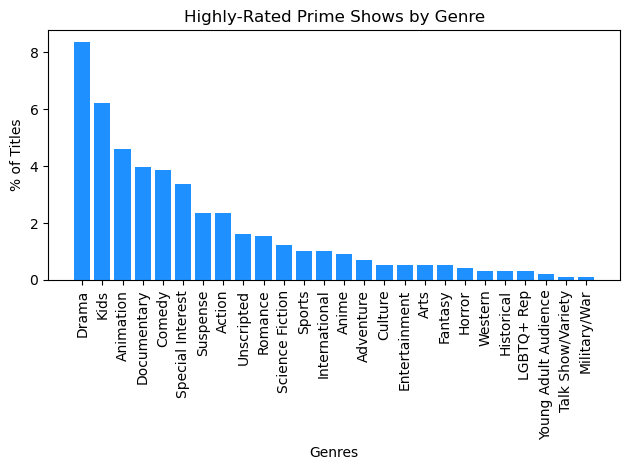

In [11]:
popular_PTV=prime_TVG.copy()
popular_PTV["Genre"]= popular_PTV["Genre"].str.replace(" ","")
popular_PTVG=popular_PTV.loc[(popular_PTV["Vote Average"]>=7)&(popular_PTV["Genre"]!="TVShows")]
PTVGenres=popular_PTVG["Genre"].value_counts()
PTVGenres
#Total- 982

PTVOOT = []
for count in PTVGenres:
    PTVOOT.append((count/982)*100)
    
x_Axis= np.arange(len(PTVGenres))
plt.bar(x_Axis, PTVOOT, color= "dodgerblue",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["Drama","Kids","Animation","Documentary","Comedy","Special Interest","Suspense","Action","Unscripted","Romance","Science Fiction","Sports","International","Anime","Adventure","Culture","Entertainment","Arts","Fantasy","Horror","Western","Historical","LGBTQ+ Rep","Young Adult Audience","Talk Show/Variety","Military/War"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Prime Shows by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/PTV.png")
plt.show()

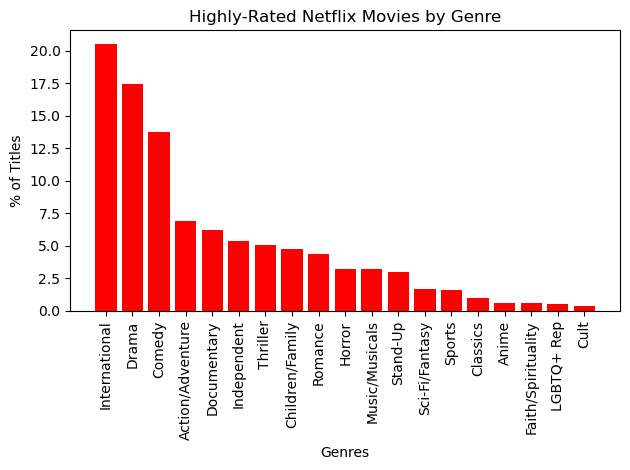

In [13]:
popular_NM=netflix_MG.copy()
popular_NM=popular_NM.loc[(netflix_MG["Vote Average"]>=7) &(netflix_MG["Genre"]!="Movies")]
popular_NM["Genre"]= popular_NM["Genre"].str.replace(" ","")
NMGenres=popular_NM["Genre"].value_counts()
NMGenres
#Total- 2108

NMOOT = []
for count in NMGenres:
    NMOOT.append((count/2108)*100)

x_Axis= np.arange(len(NMGenres))
plt.bar(x_Axis, NMOOT, color="red",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["International","Drama","Comedy","Action/Adventure","Documentary","Independent","Thriller","Children/Family","Romance","Horror","Music/Musicals","Stand-Up","Sci-Fi/Fantasy","Sports","Classics","Anime","Faith/Spirituality","LGBTQ+ Rep","Cult"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Netflix Movies by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/NM.png")
plt.show()

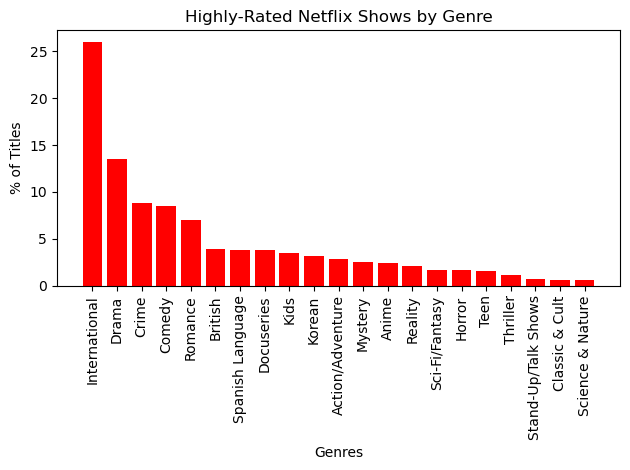

In [14]:
popular_NTV=netflix_TVG.copy()
popular_NTV=popular_NTV.loc[(popular_NTV["Vote Average"]>=7) & (popular_NTV["Genre"]!="TV Shows")]
popular_NTV["Genre"]= popular_NTV["Genre"].str.replace(" ","")
NTVGenres=popular_NTV["Genre"].value_counts()
NTVGenres
#Total- 8347

NTVOOT = []
for count in NTVGenres:
    NTVOOT.append((count/8347)*100)

x_Axis= np.arange(len(NTVGenres))
plt.bar(x_Axis, NTVOOT, color="red",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["International","Drama","Crime","Comedy","Romance","British","Spanish Language","Docuseries","Kids","Korean","Action/Adventure","Mystery","Anime","Reality","Sci-Fi/Fantasy","Horror","Teen","Thriller","Stand-Up/Talk Shows","Classic & Cult","Science & Nature"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Netflix Shows by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/NTV.png")
plt.show()

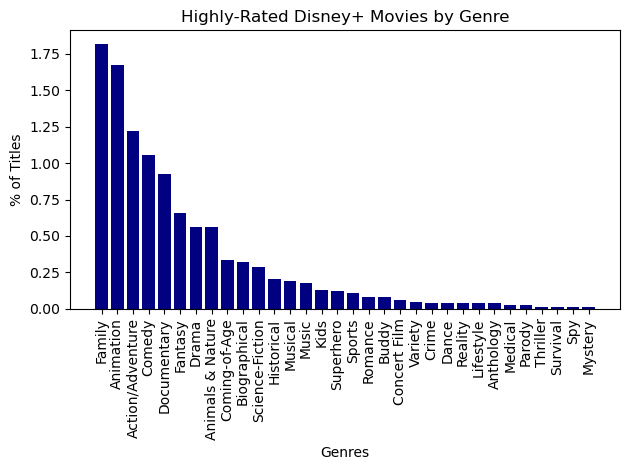

In [16]:
popular_DM=disney_MG.copy()
popular_DM=popular_DM.loc[(disney_MG["Vote Average"]>=7) & (disney_MG["Genre"] != "Movies")]
popular_DM["Genre"]= popular_DM["Genre"].str.replace(" ","")
DMGenres=popular_DM["Genre"].value_counts()
DMGenres
#Total- 911

DMOOT = []
for count in DMGenres:
    DMOOT.append((count/8347)*100)
    
x_Axis= np.arange(len(DMGenres))
plt.bar(x_Axis, DMOOT, color="navy",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["Family","Animation","Action/Adventure","Comedy","Documentary","Fantasy","Drama","Animals & Nature","Coming-of-Age","Biographical","Science-Fiction","Historical","Musical","Music","Kids","Superhero","Sports","Romance","Buddy","Concert Film","Variety","Crime","Dance","Reality","Lifestyle","Anthology","Medical","Parody","Thriller","Survival","Spy","Mystery"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Disney+ Movies by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/DM.png")
plt.show()

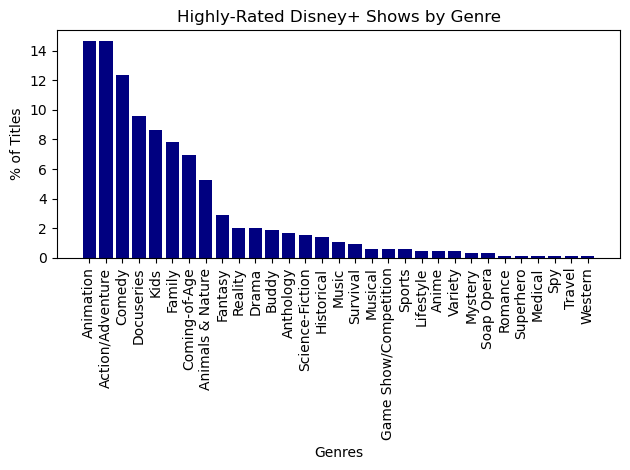

In [17]:
popular_DTV=disney_TVG.copy()
popular_DTV=popular_DTV.loc[(popular_DTV["Vote Average"]>=7) & (popular_DTV["Genre"]!="Series")]
popular_DTV["Genre"]= popular_DTV["Genre"].str.replace(" ","")
DTVGenres=popular_DTV["Genre"].value_counts()
DTVGenres
#Total- 649

DTVOOT = []
for count in DTVGenres:
    DTVOOT.append((count/649)*100)

x_Axis= np.arange(len(DTVGenres))
plt.bar(x_Axis, DTVOOT, color="navy",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["Animation","Action/Adventure","Comedy","Docuseries","Kids","Family","Coming-of-Age","Animals & Nature","Fantasy","Reality","Drama","Buddy","Anthology","Science-Fiction","Historical","Music","Survival","Musical","Game Show/Competition","Sports","Lifestyle","Anime","Variety","Mystery","Soap Opera","Romance","Superhero","Medical","Spy","Travel","Western"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Disney+ Shows by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/DTV.png")
plt.show()

## Question To Be Answered: Does Netflix have a sustainable competitive advantage in pursuing international content/production?

The following section of data identifies the highest-rated titles for each streaming service's content libraries (for the most part seperated by "Movies" and "Shows"). It then grabs roughly the top 9 countries of origin for Netflix for each category, and populates a pie chart with the ratio of popular titles versus the total titles from each country. Additional graphics were produced for Prime (when possible) and Disney to assess whether they posed any significant threat. 

In [18]:
prime_TVC = pd.read_csv("../Cleanish Data/Prime TV.csv")
netflix_MC = pd.read_csv("../Cleanish Data/By Country/Netflix Movies(C).csv")
netflix_TVC = pd.read_csv("../Cleanish Data/By Country/Netflix TV(C).csv")
disney_MC = pd.read_csv("../Cleanish Data/By Country/Disney Movies(C).csv")
disney_TVC = pd.read_csv("../Cleanish Data/By Country/Disney TV(C).csv")

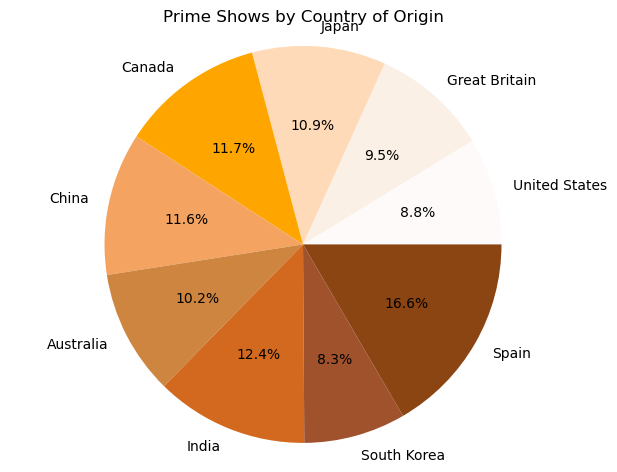

In [39]:
popular_PTV=prime_TVC.copy()
popular_PTV=popular_PTV.loc[(prime_TVC["Vote Average"]>=7) & (prime_TVC["Country"] != "Unknown")]
PTVCountries=popular_PTV["Country"].value_counts()
PTVCountries

#Grabs the total number of titles originating from each country to calculate ratio.
AllPTV = prime_TVC.copy()
AllPTV["Country"]= AllPTV["Country"].str.replace(" ","")
AllPTV = AllPTV.loc[(AllPTV["Country"]!= "Unknown")]
AllPTV["Country"].value_counts()
PTVTotals = [177,104,48,43,40,19,14,14,7]

#Grabs the countries with significant/notable values to declutter graphic.
Countries=[]
for i in range (0,9):
    Countries.append(PTVCountries[i]/PTVTotals[i])
    
Names = ["United States","Great Britain","Japan","Canada","China","Australia","India","South Korea","Spain"]#,"Denmark","Mexico","France","Brazil"]#,"Saudi Arabia","Austria","Ireland","Thailand","Portugal","Russia","Italy","Philippines"]
Colors = ["snow","linen","peachpuff","orange","sandybrown","peru","chocolate","sienna","saddlebrown"]
plt.pie(Countries,labels=Names, colors=Colors, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Prime Shows by Country of Origin")
plt.tight_layout()
plt.savefig("../Charts/Country ROI/PTV.png")
plt.show()

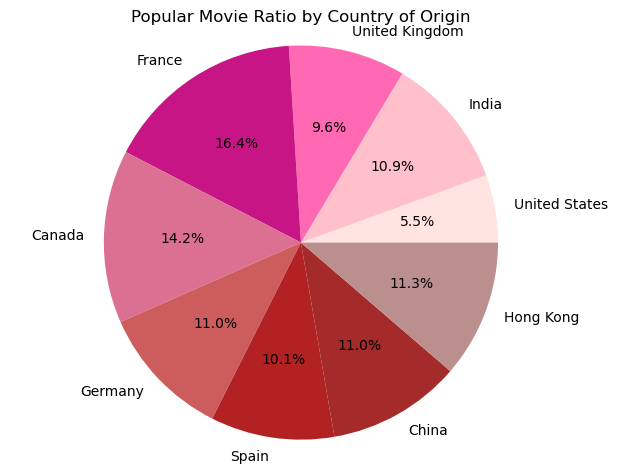

In [40]:
popular_NM=netflix_MC.copy()
popular_NM=popular_NM.loc[netflix_MC["Vote Average"]>=7]
popular_NM["Country"]= popular_NM["Country"].str.replace(" ","")
NMCountries=popular_NM["Country"].value_counts()
NMCountries

AllM = netflix_MC.copy()
AllM["Country"]= AllM["Country"].str.replace(" ","")
AllM = AllM.loc[(AllM["Country"]!= "Unknown")]
AllM["Country"].value_counts()
MTotals = [1740,567,340,191,204,110,107,66,64]

Countries=[]
for i in range (0,9):
    Countries.append(PTVCountries[i]/MTotals[i])
    
Names = ["United States","India","United Kingdom","France","Canada","Germany","Spain","China","Hong Kong"]
Colors= ["mistyrose","pink","hotpink","mediumvioletred","palevioletred","indianred","firebrick","brown","rosybrown"]
plt.pie(Countries,labels=Names,colors=Colors, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Popular Movie Ratio by Country of Origin")
plt.tight_layout()
plt.savefig("../Charts/Country ROI/NM.png")
plt.show()

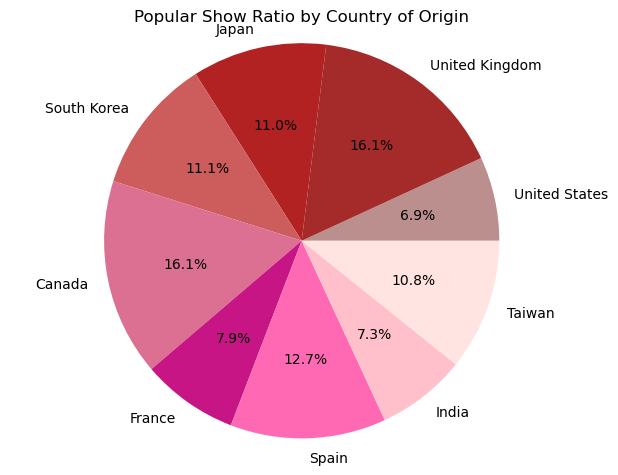

In [41]:
popular_NTV=netflix_TVC.copy()
popular_NTV=popular_NTV.loc[(netflix_TVC["Vote Average"]>=7) & (netflix_TVC["Country"] != "Unknown") & (netflix_TVC["Country"] != "US")]
popular_NTV["Country"]= popular_NTV["Country"].str.replace(" ","")
NTVCountries=popular_NTV["Country"].value_counts()
NTVCountries

AllTV = netflix_TVC.copy()
AllTV["Country"]= AllTV["Country"].str.replace(" ","")
AllTV = AllTV.loc[(AllTV["Country"]!= "Unknown")]
AllTV["Country"].value_counts()
TVTotals = [313,85,66,63,40,34,19,22,15]

Countries=[]
for i in range (0,9):
    Countries.append(PTVCountries[i]/TVTotals[i])
    
Names = ["United States","United Kingdom","Japan","South Korea","Canada","France","Spain","India","Taiwan"]
Colors= ["rosybrown","brown","firebrick","indianred","palevioletred","mediumvioletred","hotpink","pink","mistyrose"]#mistyrose","pink","hotpink","mediumvioletred","palevioletred","indianred","firebrick","brown","rosybrown"]
plt.pie(Countries,labels=Names, colors=Colors,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Popular Show Ratio by Country of Origin")
plt.tight_layout()
plt.savefig("../Charts/Country ROI/NM.png")
plt.show()



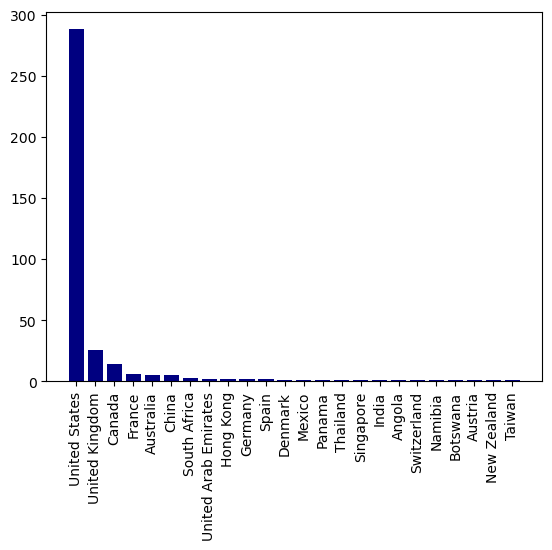

In [31]:
popular_DM=disney_MC.copy()
popular_DM=popular_DM.loc[(disney_MC["Vote Average"]>=7) & (disney_MC["Country"]!= "Unknown")]
popular_DM["Country"]= popular_DM["Country"].str.replace(" ","")
DMCountries=popular_DM["Country"].value_counts()
DMCountries

x_Axis= np.arange(len(DMCountries))
plt.bar(x_Axis, DMCountries, color="navy",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["United States","United Kingdom","Canada","France","Australia","China","South Africa","United Arab Emirates","Hong Kong","Germany","Spain","Denmark","Mexico","Panama","Thailand","Singapore","India","Angola","Switzerland","Namibia","Botswana","Austria","New Zealand","Taiwan"], rotation="vertical")
plt.show()

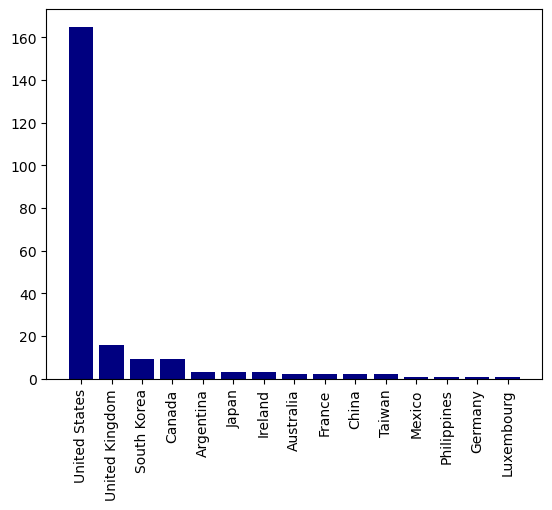

In [32]:
popular_DTV=disney_TVC.copy()
popular_DTV=popular_DTV.loc[(disney_TVC["Vote Average"]>=7) & (disney_TVC["Country"] != "Unknown")]
popular_DTV["Country"]= popular_DTV["Country"].str.replace(" ","")
DTVCountries=popular_DTV["Country"].value_counts()
DTVCountries

x_Axis= np.arange(len(DTVCountries))
plt.bar(x_Axis, DTVCountries, color="navy",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["United States","United Kingdom","South Korea","Canada","Argentina","Japan","Ireland","Australia","France","China","Taiwan","Mexico","Philippines","Germany","Luxembourg"], rotation="vertical")
plt.show()

## Question To Be Answered: Is there a correlation between the number of seasons of a show and its average TMDB Score? If not, in general, are platforms effective in identifiying which shows to extend and which to canel relating to audience interests?

The following section of data aims to answer the foregoing question. Upon realising, no correlation existed, bar charts were produced to show the distribution of "# of Seasons" of both the highest and lowest rated to determine whether streaming services are aware of general audience sentiment regarding specific content.

In [33]:
prime_TV = pd.read_csv("../Cleanish Data/Prime TV.csv")
netflix_TV = pd.read_csv("../Cleanish Data/Netflix TV.csv")
disney_TV = pd.read_csv("../Cleanish Data/Disney TV.csv")

The r-value is: 0.0017482089567730722.


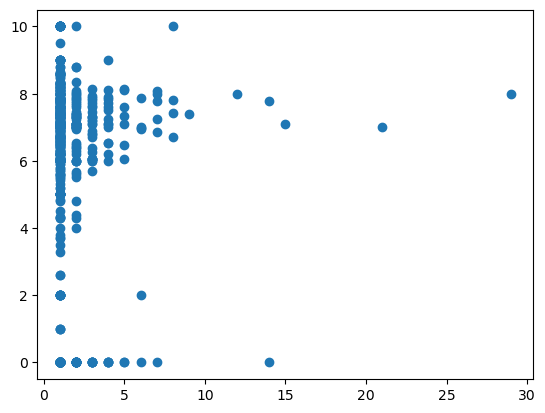

In [36]:
#Is there a correlation between the number of seasons of a show and its average TMDB Score? NO
popular_PTVD= prime_TV.copy()
popular_PTVD["Duration"]= popular_PTVD["Duration"].str.replace("Seasons","")
popular_PTVD["Duration"]= popular_PTVD["Duration"].str.replace("Season","")

C = popular_PTVD.copy()
C["Duration"]= pd.to_numeric(C["Duration"])

plt.scatter(C["Duration"],C["Vote Average"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(C["Duration"], C["Vote Average"])
print(f"The r-value is: {rvalue**2}.")

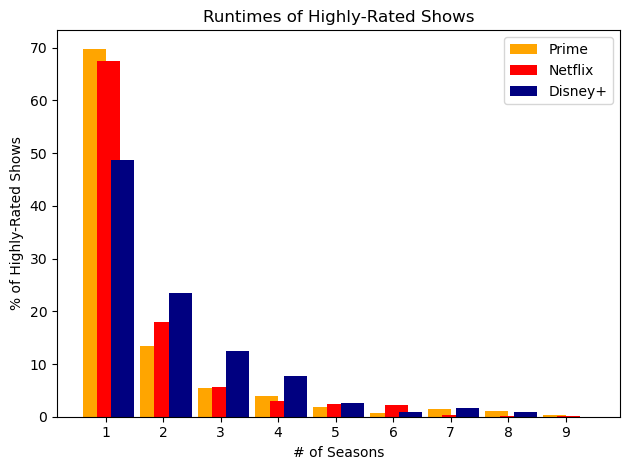

In [37]:
#Distribution of # of seasons compared to highly-rated shows across all platforms.
popular_PTVD = popular_PTVD.loc[(popular_PTVD["Vote Average"]>=7)] 
PTV_Durations=popular_PTVD["Duration"].value_counts()
PTV_Durations
#Total- 275

popular_NTVD= netflix_TV.copy()
popular_NTVD = popular_NTVD.loc[(popular_NTVD["Vote Average"]>=7)]
NTV_Durations=popular_NTVD["Duration"].value_counts()
NTV_Durations
#Total- 543

popular_DTVD= disney_TV.copy()
popular_DTVD = popular_DTVD.loc[(popular_DTVD["Vote Average"]>=7)]
DTV_Durations=popular_DTVD["Duration"].value_counts()
DTV_Durations
#Total- 234

X=[1,2,3,4,5,6,7,8,9]
Prime=[(192/275)*100,(37/275)*100,(15/275)*100,(11/275)*100,(5/275)*100,(2/275)*100,(4/275)*100,(3/275)*100,(1/275)*100]
Netflix = [(366/543)*100,(98/543)*100,(31/543)*100,(16/543)*100,(13/543)*100,(12/543)*100,(2/543)*100,(1/543)*100,(1/543)*100]
Disney =[(114/234)*100,(55/234)*100,(29/234)*100,(18/234)*100,(6/234)*100,(2/234)*100,(4/234)*100,(2/234)*100,0]
x_Axis=np.arange(len(X))
plt.bar(x_Axis,Prime,0.4,label="Prime", color="orange",align="edge")
plt.bar(x_Axis+0.25,Netflix,0.4,label="Netflix", color="red",align="edge")
plt.bar(x_Axis+(0.25*2),Disney,0.4,label="Disney+", color="navy",align="edge")
tickLocations = [value+0.4 for value in x_Axis]
plt.xticks(tickLocations,X)
plt.xlabel("# of Seasons")
plt.ylabel("% of Highly-Rated Shows")
plt.title("Runtimes of Highly-Rated Shows")
plt.legend()
plt.tight_layout()
plt.savefig("../Charts/Runtimes (H).png")
plt.show()

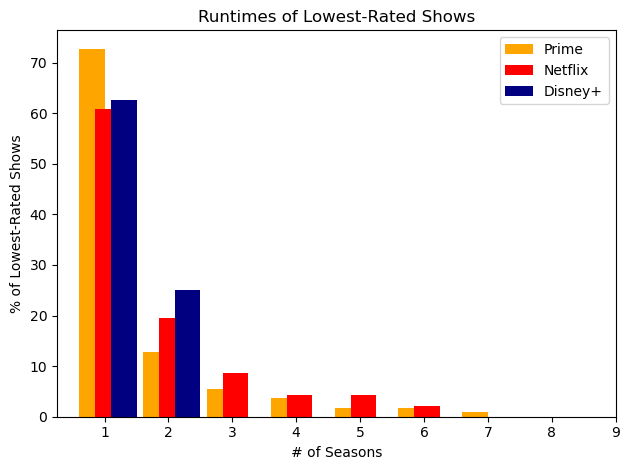

In [38]:
#Distribution of # of seasons compared to lowest-rated shows across all platforms.
unpopular_PTVD = prime_TV.copy()
unpopular_PTVD = unpopular_PTVD.loc[(unpopular_PTVD["Vote Average"]<=3)] 
UPTV_Durations=unpopular_PTVD["Duration"].value_counts()
UPTV_Durations
#Total- 110

unpopular_NTVD = netflix_TV.copy()
unpopular_NTVD = unpopular_NTVD.loc[(unpopular_NTVD["Vote Average"]<=3)] 
NTV_Durations=unpopular_NTVD["Duration"].value_counts()
NTV_Durations

#Total- 46

unpopular_DTVD = disney_TV.copy()
unpopular_DTVD = unpopular_DTVD.loc[(unpopular_DTVD["Vote Average"]<=3)] 
DTV_Durations=unpopular_DTVD["Duration"].value_counts()
DTV_Durations
# Total- 8

XU=[1,2,3,4,5,6,7]
PrimeU=[(80/110)*100,(14/110)*100,(6/110)*100,(4/110)*100,(2/110)*100,(2/110)*100,(1/110)*100]
NetflixU = [(28/46)*100,(9/46)*100,(4/46)*100,(2/46)*100,(2/46)*100,(1/46)*100,0]
DisneyU =[(5/8)*100,(2/8)*100,0,0,0,0,0]
x_AxisU=np.arange(len(XU))
plt.bar(x_AxisU,PrimeU,0.4,label="Prime", color="orange",align="edge")
plt.bar(x_AxisU+0.25,NetflixU,0.4,label="Netflix", color="red",align="edge")
plt.bar(x_AxisU+(0.25*2),DisneyU,0.4,label="Disney+", color="navy",align="edge")
tickLocations = [value+0.4 for value in x_Axis]
plt.xticks(tickLocations,X)
plt.xlabel("# of Seasons")
plt.ylabel("% of Lowest-Rated Shows")
plt.title("Runtimes of Lowest-Rated Shows")
plt.legend()
plt.tight_layout()
plt.savefig("../Charts/Runtimes (L).png")
plt.show()

In [4]:
tv_shows_pd = pd.read_csv("Libraries/tv_shows.csv")
tv_shows_pd.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


Text(0.5, 1.0, 'Age Distribution of TV Shows on Netflix')

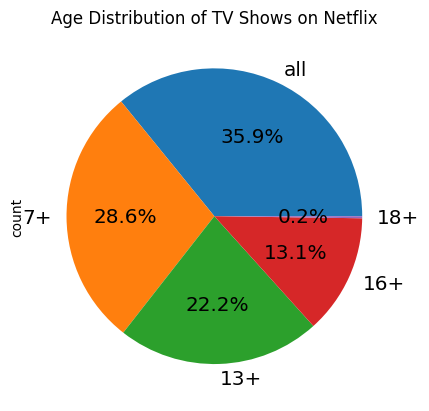

In [5]:
tv_shows_netflix_ID = tv_shows_pd.loc[tv_shows_pd['Netflix'] == 1, :]
tv_shows_netflix_ID
#gets the dataframe for netflix shows that cater to age group of 18+
netflix_over_18_pd = tv_shows_netflix_ID.loc[tv_shows_netflix_ID['Age'] == '18+',:]
netflix_over_18_count = netflix_over_18_pd['ID'].nunique()
netflix_over_18_count
netflix_over_18_pd
labels = ['all','7+','13+','16+','18+']
netflix_age_data = tv_shows_netflix_ID["Age"].value_counts()
netflix_age_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of TV Shows on Netflix")

Text(0.5, 1.0, 'Age Distribution of TV Shows on Hulu')

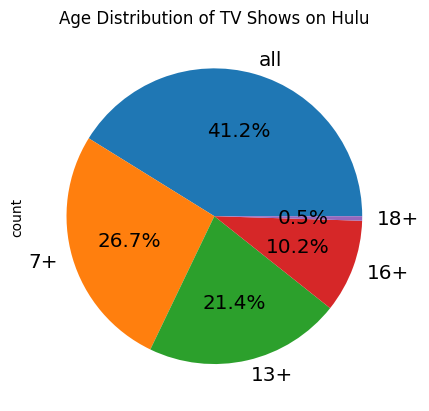

In [6]:
#gets the data for shows 18+ appearing on hulu
tv_shows_hulu_ID = tv_shows_pd.loc[tv_shows_pd['Hulu'] == 1, :]
#gets the dataframe for hulu shows that cater to age group of 18+
hulu_over_18_pd = tv_shows_hulu_ID.loc[tv_shows_hulu_ID['Age'] == '18+',:]
hulu_over_18_count = hulu_over_18_pd['ID'].nunique()
hulu_over_18_count
hulu_over_18_pd
#Pie Chart showing the age distribution on Prime Video shows
Hulu_Video_data = tv_shows_hulu_ID["Age"].value_counts()
Hulu_Video_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of TV Shows on Hulu")

Text(0.5, 1.0, 'Age Distribution of TV Shows on Prime Video')

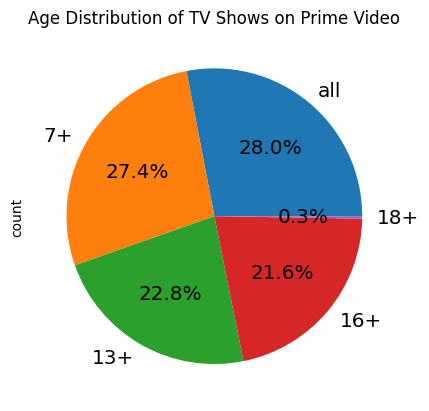

In [7]:
#gets the data for shows 18+ appearing on Prime Video
tv_shows_primevid_ID = tv_shows_pd.loc[tv_shows_pd['Prime Video'] == 1, :]
#gets the dataframe for Prime Video shows that cater to age group of 18+
primevid_over_18_pd = tv_shows_primevid_ID.loc[tv_shows_primevid_ID['Age'] == '18+',:]
primevid_over_18_count = primevid_over_18_pd['ID'].nunique()
primevid_over_18_count
primevid_over_18_pd
#Pie Chart showing the age distribution on Prime Video shows
Prime_Video_data = tv_shows_primevid_ID["Age"].value_counts()
Prime_Video_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of TV Shows on Prime Video")

In [8]:
#gets the data for shows 18+ appearing on Disney+
tv_shows_disney_ID = tv_shows_pd.loc[tv_shows_pd['Disney+'] == 1, :]
#gets the dataframe for Disney+ shows that cater to age group of 18+
disney_over_18_pd = tv_shows_disney_ID.loc[tv_shows_disney_ID['Age'] == '18+',:]
disney_over_18_count = disney_over_18_pd['ID'].nunique()
disney_over_18_count
disney_over_18_pd

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
2682,2682,2786,A Christmas Carol,2019,18+,7.2/10,54/100,0,1,0,1,1
3452,3452,3591,Invincible,2021,18+,8.7/10,88/100,0,0,1,1,1


Text(0.5, 1.0, 'Age Distribution of TV Shows on Disney')

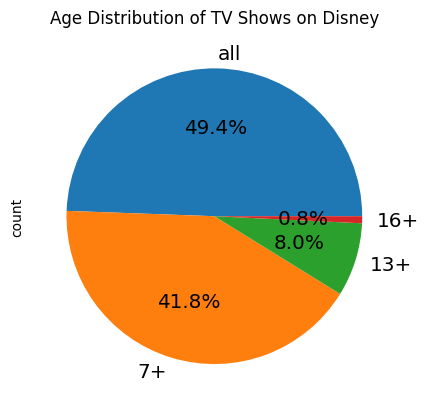

In [9]:
#Pie Chart showing the age distribution on disney shows
Disney_Age_data = tv_shows_disney_ID["Age"].value_counts()

Disney_Age_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of TV Shows on Disney")

In [10]:
#movies
movies_pd = pd.read_csv("Libraries/MoviesOnStreamingPlatforms.csv")
movies_pd.head()
movies_count = movies_pd['ID'].nunique()
movies_count

9515

Text(0.5, 1.0, 'Age Distribution of Movies on Netflix')

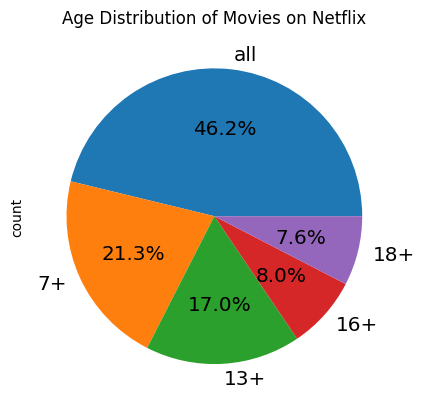

In [11]:
#gets the dataframe for netflix movies and their age

movies_netflix_ID = movies_pd.loc[movies_pd['Netflix'] == 1, :]
#Pie Chart showing the age distribution on Prime Video shows
movies_netflix_data = movies_netflix_ID["Age"].value_counts()
movies_netflix_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of Movies on Netflix")

Text(0.5, 1.0, 'Age Distribution of Movies on Hulu')

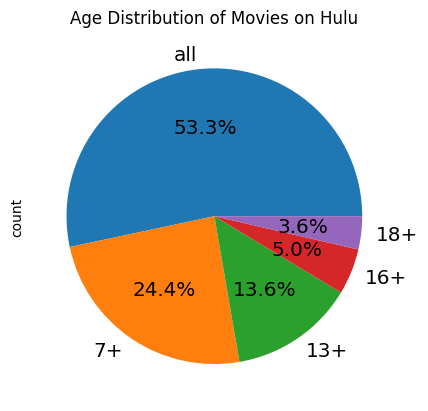

In [12]:
#gets the dataframe for hulu movies and their age

movies_hulu_ID = movies_pd.loc[movies_pd['Hulu'] == 1, :]
#Pie Chart showing the age distribution on Prime Video shows
movies_hulu_data = movies_hulu_ID["Age"].value_counts()
movies_hulu_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of Movies on Hulu")


Text(0.5, 1.0, 'Age Distribution of Movies on Prime Video')

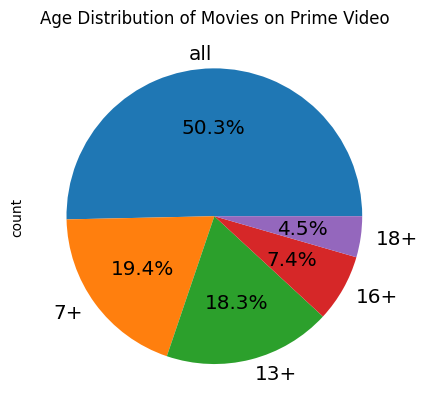

In [13]:
#gets the dataframe for Prime Video movies and their age

movies_primeVid_ID = movies_pd.loc[movies_pd['Prime Video'] == 1, :]
#Pie Chart showing the age distribution on Prime Video shows
movies_primeVid_data = movies_primeVid_ID["Age"].value_counts()
movies_primeVid_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of Movies on Prime Video")

Text(0.5, 1.0, 'Age Distribution of Movies on Disney+')

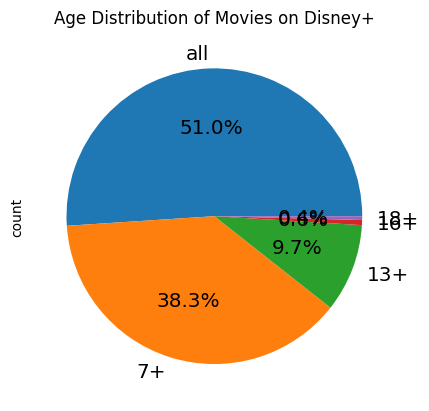

In [14]:
#gets the dataframe for Disney+ movies and their age

movies_Disney_ID = movies_pd.loc[movies_pd['Disney+'] == 1, :]
#Pie Chart showing the age distribution on Prime Video shows
movies_Disney_data = movies_Disney_ID["Age"].value_counts()
movies_Disney_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of Movies on Disney+")